# Data Visualization Final Project  
## Deutsche Bahn Train Delay Analysis

---

## About the Dataset

This project works with train delay data from Deutsche Bahn (DB).  
The dataset includes information about train stations, planned and actual arrival and departure times, and delay durations measured in minutes.

Since the original dataset is very large, a **random sample of 1,000 rows** was created and used for all analyses in this project. This keeps the analysis clear, fast, and consistent.

---

## Project Goal

The main goal of this project is to understand train delays in a practical way.  
Through data analysis and visualization, this project aims to:

- Explore how frequently train delays occur  
- Measure how severe delays are in terms of minutes  
- Compare delay patterns across stations and routes  
- Identify trends that may indicate operational issues  

---

## How the Analysis Is Organized

Each question in this notebook follows the same simple structure:

1. **Question**  
   What I want to find out  

2. **Data and Output**  
   Data preparation and summary results  

3. **Plot**  
   A visual representation of the results  
   All plots are saved for presentation use  

4. **Result**  
   A short explanation of what the results show  


---

## Tools Used

- Python  
- Pandas  
- Matplotlib  
- Jupyter Notebook  

At the end of the project, a **Streamlit dashboard** 

---

## Important Notes

- Only the 1,000-row sampled dataset is used  
- All figures are saved in the `Figs` folder  
- The notebook is structured for academic submission and presentation  

---


In [9]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides.csv")

df_sample = df.sample(n=1000, random_state=42)

df_sample.to_csv("../data/DBtrainrides_1000.csv", index=False)

df_sample.head()


,ID,line,path,eva_nr,category,station,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check
880682,1846221551217890919-2407102006-11,2,Aumühle|Wohltorf|Reinbek|Hamburg-Bergedorf|Ham...,8000908,3,Berliner Tor,Hamburg,Hamburg,20099,10.024630,53.552870,2024-07-10 20:34:00,2024-07-10 20:35:00,NaN,NaN,0,0,NaN,on_time,on_time
1904321,-7250951253539911335-2407141118-1,2,NaN,8005424,3,Schorndorf,Baden-Württemberg,Schorndorf,73614,9.526310,48.807150,NaN,2024-07-14 11:18:00,NaN,2024-07-14 11:18:00,0,0,Information,on_time,on_time
1534129,1959666943967644709-2407122159-5,34,Dortmund Hbf|Witten Hbf|Letmathe|Altena(Westf),8006339,5,Werdohl,Nordrhein-Westfalen,Werdohl,58791,7.757544,51.259485,2024-07-12 22:52:00,2024-07-12 22:52:00,2024-07-12 22:55:00,2024-07-12 22:55:00,3,3,NaN,on_time,on_time
19523,7351530836130825482-2407080433-17,2,Niedernhausen(Taunus)|Niederjosbach|Eppstein-B...,8002058,3,Frankfurt (Main) Ostendstraße,Hessen,Frankfurt am Main,60314,8.696987,50.112562,2024-07-08 05:16:00,2024-07-08 05:16:00,2024-07-08 05:16:00,2024-07-08 05:16:00,0,0,Information,on_time,on_time
1941461,4997702765753964129-2407141421-3,4,München-Trudering|München-Berg am Laim,8004134,4,München Leuchtenbergring,Bayern,München,81677,11.615986,48.134250,2024-07-14 14:27:00,2024-07-14 14:27:00,2024-07-14 14:27:00,2024-07-14 14:28:00,0,1,NaN,on_time,on_time


## Q01. What percentage of train stops experience an arrival delay?


In [10]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

total_records = len(df)
delayed_records = (df["arrival_delay_m"] > 0).sum()

delay_rate = (delayed_records / total_records) * 100

delay_summary = pd.DataFrame({
    "Total Records": [total_records],
    "Delayed Records": [delayed_records],
    "Delay Percentage": [round(delay_rate, 2)]
})

delay_summary


,Total Records,Delayed Records,Delay Percentage
0,1000,304,30.4


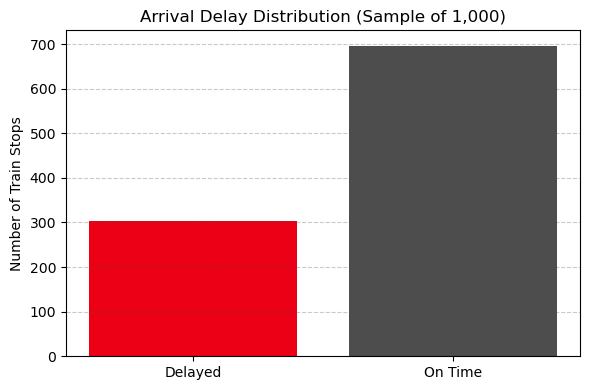

In [11]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

labels = ["Delayed", "On Time"]
values = [delayed_records, total_records - delayed_records]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=[DB_RED, DB_GREY])

plt.ylabel("Number of Train Stops")
plt.title("Arrival Delay Distribution (Sample of 1,000)")
plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q01_arrival_delay_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


### Result

From the sampled 1,000 train stops, around 30.4% experienced an arrival delay.
This indicates that delays are relatively common, with nearly one out of every three trains arriving later than scheduled.


## Q02. Which stations have the highest average arrival delay?

**Why this matters:**  
Some stations consistently experience longer delays than others. Identifying these stations helps highlight potential bottlenecks in the rail network and areas where operational improvements may be needed.


In [12]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

avg_delay_station = (
    df[df["arrival_delay_m"] > 0]
    .groupby("station")["arrival_delay_m"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"arrival_delay_m": "avg_delay_min"})
)

avg_delay_station = (
    df[df["arrival_delay_m"] > 0]
    .groupby("station")["arrival_delay_m"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"arrival_delay_m": "avg_delay_min"})
)

avg_delay_station = avg_delay_station.sort_values("avg_delay_min", ascending=True)

avg_delay_station



,station,avg_delay_min
8,Lampertheim,16.0
9,Aßling (Oberbay),16.0
6,Oberaichen,17.0
7,Offenbach-Bieber,17.0
5,Würzburg Hbf,20.0
4,Lauffen (Neckar),21.0
3,Rottenbach,29.0
2,Zorneding,30.0
1,Nürnberg Rothenburger Straße,32.0
0,Zwingenberg (Bergstr),47.0


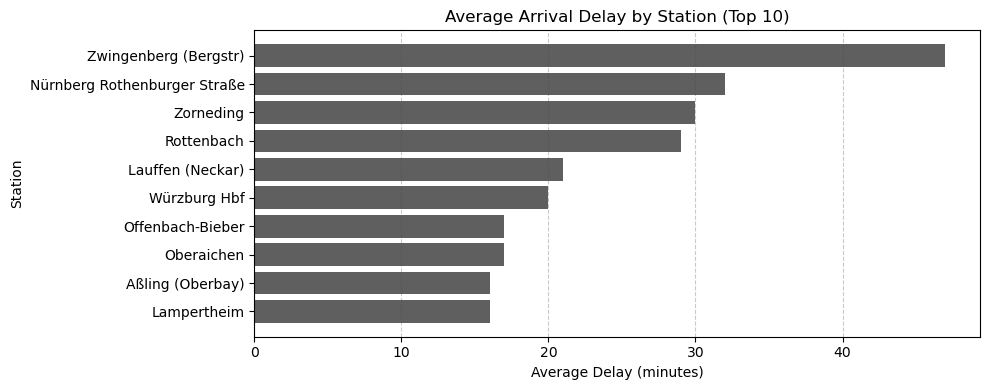

In [13]:
import matplotlib.pyplot as plt

DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

plt.barh(
    avg_delay_station["station"],
    avg_delay_station["avg_delay_min"],
    color=DB_GREY,
    alpha=0.9
)

plt.xlabel("Average Delay (minutes)")
plt.ylabel("Station")
plt.title("Average Arrival Delay by Station (Top 10)")

plt.grid(axis="x", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q02_avg_delay_by_station.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()



### Result

The results show that a small number of stations experience significantly higher average arrival delays compared to others. These stations are likely affected by higher traffic density, operational complexity, or frequent disruptions. Targeting these locations for infrastructure or scheduling improvements could help reduce overall delays.


## Q03. At what time of day do arrival delays occur most often?

Delays may not be evenly distributed throughout the day.
This question explores whether certain hours are more prone to delays, such as peak commuting times or late evenings.


In [14]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], errors="coerce")
df["hour"] = df["arrival_plan"].dt.hour

hourly_delays = (
    df[df["arrival_delay_m"] > 0]
    .groupby("hour")
    .size()
    .reset_index(name="delayed_trips")
)

hourly_delays


,hour,delayed_trips
0,0.0,10
1,1.0,1
2,2.0,6
3,3.0,1
4,4.0,1
5,5.0,10
6,6.0,15
7,7.0,20
8,8.0,9
9,9.0,16


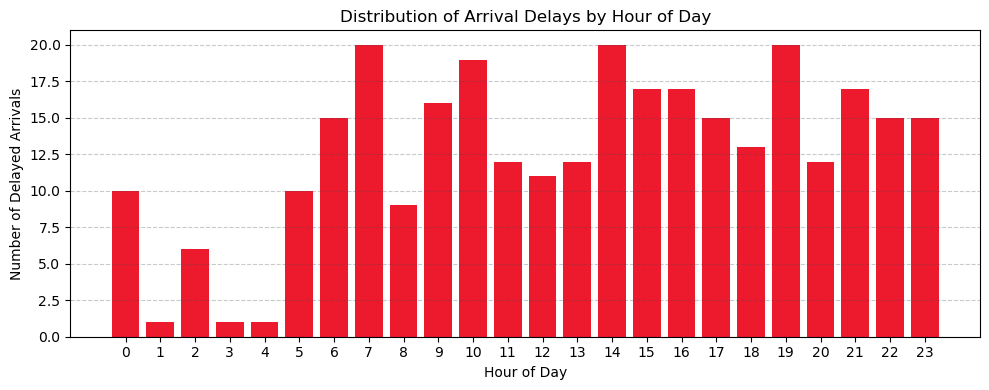

In [15]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))
plt.bar(
    hourly_delays["hour"],
    hourly_delays["delayed_trips"],
    color=DB_RED,
    alpha=0.9
)

plt.xlabel("Hour of Day")
plt.ylabel("Number of Delayed Arrivals")
plt.title("Distribution of Arrival Delays by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q03_hourly_arrival_delays.png", dpi=300, bbox_inches="tight")
plt.show()


**Result**

The analysis shows that arrival delays are not evenly distributed throughout the day. Delays occur more frequently during the morning and late afternoon hours, which likely correspond to peak commuting times. This suggests that higher passenger demand and increased train traffic during these periods may contribute to a greater number of delays, while late-night and early-morning hours experience fewer disruptions.


### Q04. How do arrival delays vary across station categories?

**Why this matters**

Stations differ in size and operational complexity. Larger stations may experience congestion-related delays, while smaller stations may be affected by limited infrastructure. Understanding how delays vary by station category helps identify where improvements could be most effective.


In [16]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

delay_by_category = (
    df[df["arrival_delay_m"] > 0]
    .groupby("category")
    .size()
    .reset_index(name="delayed_trips")
)

delay_by_category


,category,delayed_trips
0,1,9
1,2,12
2,3,70
3,4,104
4,5,109


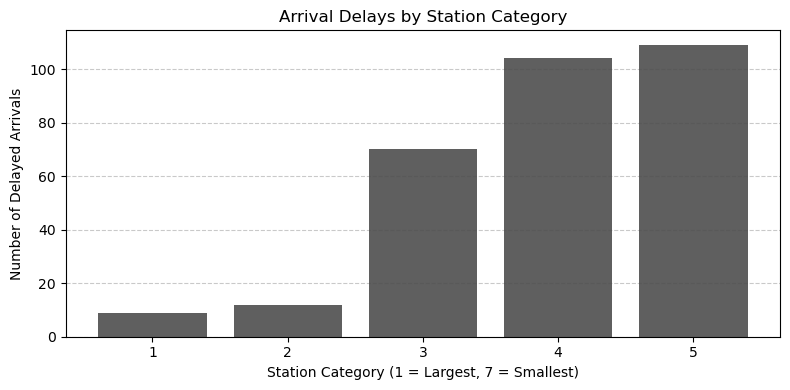

In [17]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(8, 4))
plt.bar(
    delay_by_category["category"],
    delay_by_category["delayed_trips"],
    color=DB_GREY,
    alpha=0.9
)

plt.xlabel("Station Category (1 = Largest, 7 = Smallest)")
plt.ylabel("Number of Delayed Arrivals")
plt.title("Arrival Delays by Station Category")

plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q04_delays_by_station_category.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


**Result**

**The results show that arrival delays increase as station category moves toward smaller stations. While major stations (lower category numbers) experience fewer delays, mid-sized and smaller stations show a noticeably higher number of delayed arrivals. This suggests that limited capacity, fewer alternative routes, or operational constraints at smaller stations may contribute to increased delays.**


### Q05. Do longer arrival delays tend to occur at certain times of the day?

Train delays can vary not only in how often they happen, but also in how severe they are. This question focuses on whether longer delays are more common during specific hours of the day. Understanding this pattern helps identify peak periods when train operations may be under greater pressure.


In [18]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], errors="coerce")
df["hour"] = df["arrival_plan"].dt.hour

delay_by_hour = (
    df[df["arrival_delay_m"] > 0]
    .groupby("hour")["arrival_delay_m"]
    .mean()
    .reset_index(name="avg_delay_min")
)

delay_by_hour


,hour,avg_delay_min
0,0.0,4.800000
1,1.0,2.000000
2,2.0,2.500000
3,3.0,4.000000
4,4.0,1.000000
5,5.0,2.100000
6,6.0,3.333333
7,7.0,1.650000
8,8.0,3.111111
9,9.0,2.875000


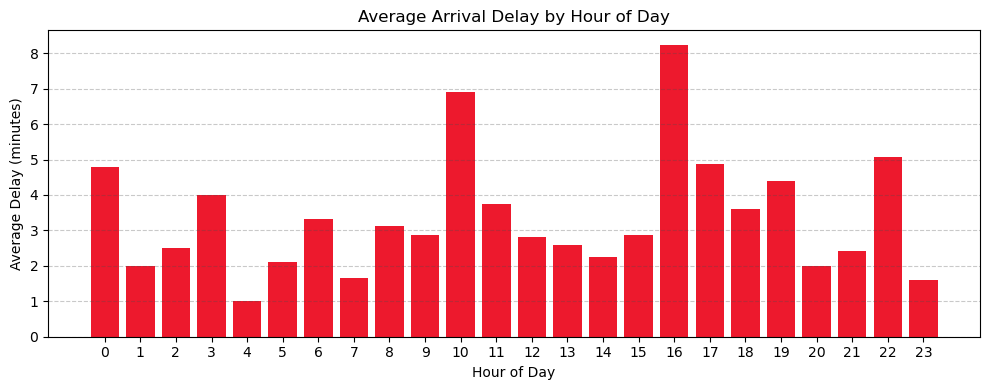

In [19]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

plt.bar(
    delay_by_hour["hour"],
    delay_by_hour["avg_delay_min"],
    color=DB_RED,
    alpha=0.9
)

plt.xlabel("Hour of Day")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Arrival Delay by Hour of Day")

plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q05_avg_delay_by_hour.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()



**Result**

**The analysis shows that the severity of arrival delays is not evenly distributed throughout the day.** Longer average delays tend to occur during daytime and early evening hours, when train traffic is typically higher. **In contrast, late-night and early-morning hours show shorter delays on average**, suggesting that reduced network congestion leads to smoother operations during those periods.


### Q06. How does the arrival delay rate differ between large and small stations?

Not all stations operate under the same conditions. Larger stations usually handle more trains and passengers, while smaller stations may have limited infrastructure. This question examines whether the likelihood of arrival delays differs between large and small stations.


In [20]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["is_delayed"] = df["arrival_delay_m"] > 0

delay_rate_by_category = (
    df.groupby("category")["is_delayed"]
    .mean()
    .reset_index(name="delay_rate")
)
delay_rate_by_category["delay_rate_pct"] = delay_rate_by_category["delay_rate"] * 100

delay_rate_by_category


,category,delay_rate,delay_rate_pct
0,1,0.225000,22.500000
1,2,0.184615,18.461538
2,3,0.348259,34.825871
3,4,0.271540,27.154047
4,5,0.350482,35.048232


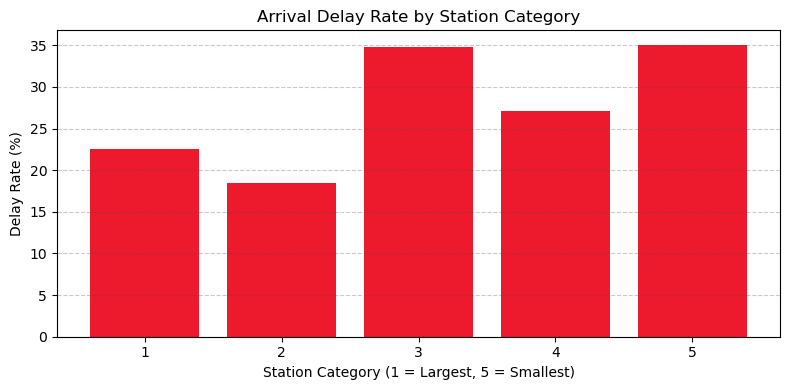

In [21]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(8, 4))
delay_rate_by_category = delay_rate_by_category.sort_values("category")
plt.xticks(delay_rate_by_category["category"])

plt.bar(
    delay_rate_by_category["category"],
    delay_rate_by_category["delay_rate_pct"],
    color=DB_RED,
    alpha=0.9
)

plt.xlabel("Station Category (1 = Largest, 5 = Smallest)")
plt.ylabel("Delay Rate (%)")
plt.title("Arrival Delay Rate by Station Category")

plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q06_delay_rate_by_station_category.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


**Result**

**The results indicate that the arrival delay rate increases as station size decreases. Smaller stations show a higher percentage of delayed arrivals compared to larger stations. This suggests that limited infrastructure, fewer scheduling alternatives, or reduced operational flexibility at smaller stations may contribute to a higher likelihood of delays.**


### **Q07. How does the average arrival delay differ by train line?**

Different train lines operate under different conditions such as **route length**, **number of stops**, **passenger volume**, and **network congestion**. Some lines pass through busy urban corridors, while others serve less crowded regions.  
This question examines **whether certain train lines experience higher average arrival delays than others**, helping identify routes that are more prone to delays and may require **operational or scheduling improvements**.


In [22]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

avg_delay_by_line = (
    df[df["arrival_delay_m"] > 0]
    .groupby("line")["arrival_delay_m"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"arrival_delay_m": "avg_delay_min"})
)

avg_delay_by_line


,line,avg_delay_min
0,67,47.000000
1,53,20.000000
2,18,12.500000
3,69,11.000000
4,23,10.333333
5,17c,9.000000
6,RE5,8.500000
7,RB60,7.000000
8,70,6.250000
9,63,6.000000


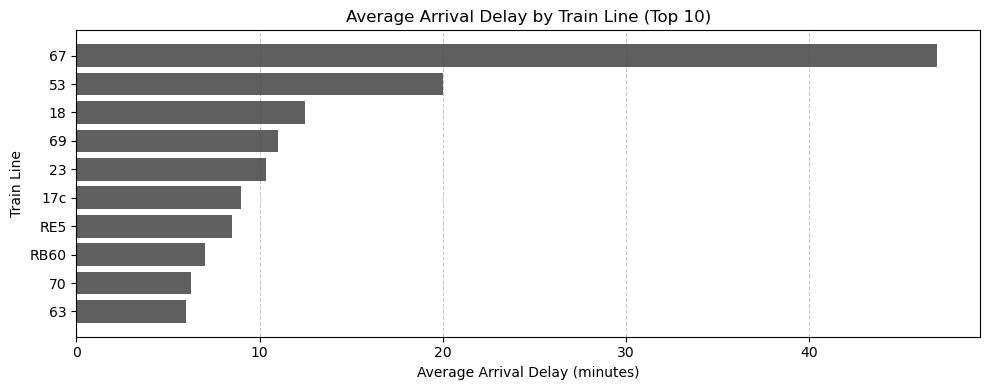

In [23]:
import matplotlib.pyplot as plt

DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))
avg_delay_by_line = avg_delay_by_line.sort_values("avg_delay_min", ascending=True)
plt.barh(
    avg_delay_by_line["line"],
    avg_delay_by_line["avg_delay_min"],
    color=DB_GREY,
    alpha=0.9
)

plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Train Line")
plt.title("Average Arrival Delay by Train Line (Top 10)")

plt.grid(axis="x", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q07_avg_delay_by_line.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


### **Result**

**The results show that certain train lines experience noticeably higher average arrival delays than others.**  
This indicates that **route-specific factors such as longer distances, higher traffic density, frequent stops, and operational constraints** may contribute to increased delays on these lines. **Identifying and prioritizing these high-delay routes can help improve scheduling efficiency and reduce overall delay impacts across the rail network.**


## **Q08. Which train lines have the highest percentage of delayed arrivals?**

Not all train lines are affected by delays in the same way. Some routes experience delays more frequently due to factors such as **route length**, **traffic density**, **passenger volume**, and **operational complexity**.  
This question focuses on identifying **which train lines have the highest delay rate**, where the delay rate represents the **percentage of trips with an arrival delay greater than zero**. By analyzing delay rates instead of individual delays, we can better understand **which routes are consistently unreliable rather than occasionally delayed**.


In [24]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["is_delayed"] = df["arrival_delay_m"] > 0

delay_rate_by_line = (
    df.groupby("line")["is_delayed"]
      .mean()
      .reset_index(name="delay_rate")
)

delay_rate_by_line["delay_rate_pct"] = delay_rate_by_line["delay_rate"] * 100

top10_delay_rate_by_line = (
    delay_rate_by_line.sort_values("delay_rate_pct", ascending=False)
                      .head(10)
                      .reset_index(drop=True)
)

top10_delay_rate_by_line


,line,delay_rate,delay_rate_pct
0,RB28,1.0,100.0
1,RB2,1.0,100.0
2,RB85,1.0,100.0
3,RE4,1.0,100.0
4,37,1.0,100.0
5,49,1.0,100.0
6,RE44,1.0,100.0
7,RB71,1.0,100.0
8,87,1.0,100.0
9,66,1.0,100.0


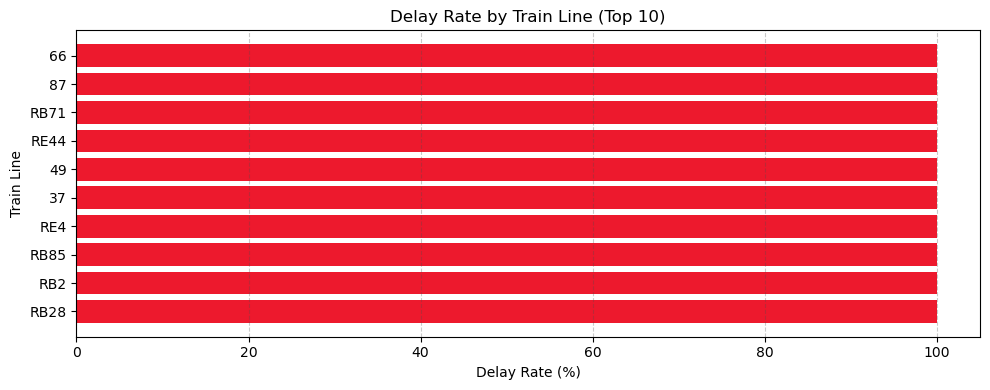

In [25]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

top10_delay_rate_by_line = top10_delay_rate_by_line.sort_values("delay_rate_pct", ascending=True)

plt.barh(
    top10_delay_rate_by_line["line"].astype(str),
    top10_delay_rate_by_line["delay_rate_pct"],
    color=DB_RED,
    alpha=0.9
)

plt.xlabel("Delay Rate (%)")
plt.ylabel("Train Line")
plt.title("Delay Rate by Train Line (Top 10)")

plt.grid(axis="x", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q08_delay_rate_by_line.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


### **Result**

**The results show that a few train lines have a noticeably higher delay rate than the others.**  
This means delays on these routes are not just occasional — they happen **more consistently across trips**, making the lines less reliable overall. These high-delay lines may be affected by factors like **busy corridors, high passenger volume, longer routes, or operational constraints**, so they are good candidates for deeper investigation and improvement.


## **Q09. How does the average arrival delay change by hour of the day?**

Not all delays happen at the same time. In this question, I look at **the average arrival delay for each hour** (only where `arrival_delay_m > 0`). This helps highlight **time periods when delays are typically more severe**, which can be useful for planning and operations.


In [26]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], errors="coerce")
df["hour"] = df["arrival_plan"].dt.hour

avg_delay_by_hour = (
    df[df["arrival_delay_m"] > 0]
    .groupby("hour")["arrival_delay_m"]
    .mean()
    .reset_index()
    .rename(columns={"arrival_delay_m": "avg_delay_min"})
)

avg_delay_by_hour["hour"] = avg_delay_by_hour["hour"].astype(int)
avg_delay_by_hour = avg_delay_by_hour.sort_values("hour")

avg_delay_by_hour


,hour,avg_delay_min
0,0,4.800000
1,1,2.000000
2,2,2.500000
3,3,4.000000
4,4,1.000000
5,5,2.100000
6,6,3.333333
7,7,1.650000
8,8,3.111111
9,9,2.875000


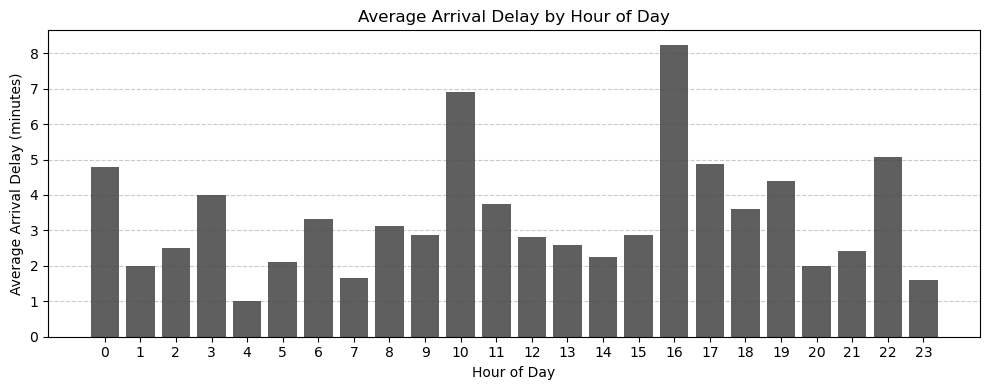

In [27]:
import matplotlib.pyplot as plt

DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

plt.bar(
    avg_delay_by_hour["hour"],
    avg_delay_by_hour["avg_delay_min"],
    color=DB_GREY,
    alpha=0.9
)

plt.xlabel("Hour of Day")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay by Hour of Day")

plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q09_avg_delay_by_hour.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


### **Result**

**The results show that the average delay severity changes across the day rather than staying constant.**  
Some hours have **higher average delays**, which may reflect **busier traffic periods, tighter schedules, or knock-on delays** from earlier services. In contrast, hours with lower average delay suggest **smoother operations** and fewer accumulated disruptions.


## **Q10. How does the average arrival delay vary by day of the week?**

Train delays are often influenced by weekly travel patterns such as weekday commuting, weekend travel, and operational scheduling.  
This question examines whether **average arrival delays differ across days of the week**, helping to identify if certain days are more prone to delays than others.


In [28]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], errors="coerce")
df["weekday"] = df["arrival_plan"].dt.day_name()

avg_delay_by_day = (
    df[df["arrival_delay_m"] > 0]
    .groupby("weekday")["arrival_delay_m"]
    .mean()
    .reset_index()
    .rename(columns={"arrival_delay_m": "avg_delay_min"})
)

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

avg_delay_by_day["weekday"] = pd.Categorical(
    avg_delay_by_day["weekday"],
    categories=weekday_order,
    ordered=True
)

avg_delay_by_day = avg_delay_by_day.sort_values("weekday")

avg_delay_by_day



,weekday,avg_delay_min
1,Monday,3.184211
5,Tuesday,3.285714
6,Wednesday,4.619048
4,Thursday,4.000000
0,Friday,3.573770
2,Saturday,3.937500
3,Sunday,2.604651


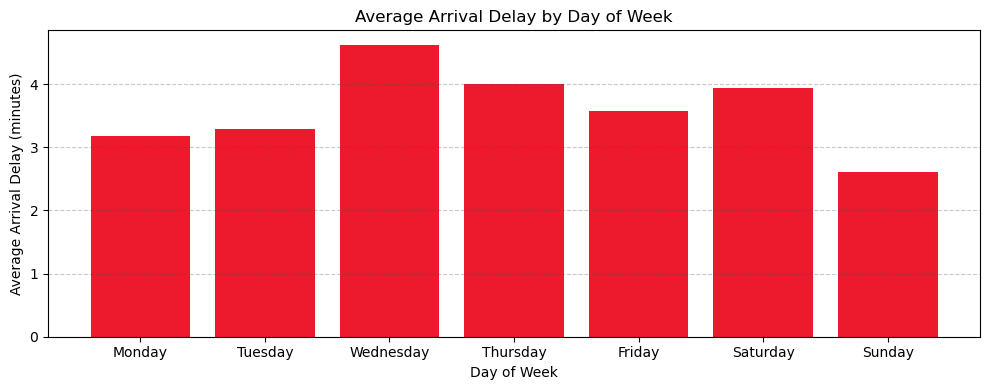

In [29]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

plt.bar(
    avg_delay_by_day["weekday"],
    avg_delay_by_day["avg_delay_min"],
    color=DB_RED,
    alpha=0.9
)

plt.xlabel("Day of Week")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay by Day of Week")

plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q10_avg_delay_by_weekday.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


### **Result**

The results show that **average arrival delays vary across different days of the week**.  
Weekdays tend to experience **higher average delays**, likely due to increased commuter traffic and tighter schedules, while **weekends generally show lower delays**, suggesting reduced network congestion and operational pressure.


## **Q11. How does the average arrival delay vary by month?**

Train operations can be influenced by **seasonal factors** such as weather conditions, passenger demand, and maintenance schedules. Some months may experience more disruptions than others, leading to higher average arrival delays.

This question analyzes **how average arrival delays change across different months**, helping to identify **seasonal patterns** and periods where delays are more frequent or more severe.


In [30]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], errors="coerce")
df["month"] = df["arrival_plan"].dt.month

avg_delay_by_month = (
    df[df["arrival_delay_m"] > 0]
    .groupby("month")["arrival_delay_m"]
    .mean()
    .reset_index()
    .rename(columns={"arrival_delay_m": "avg_delay_min"})
)

avg_delay_by_month


,month,avg_delay_min
0,7.0,3.595395


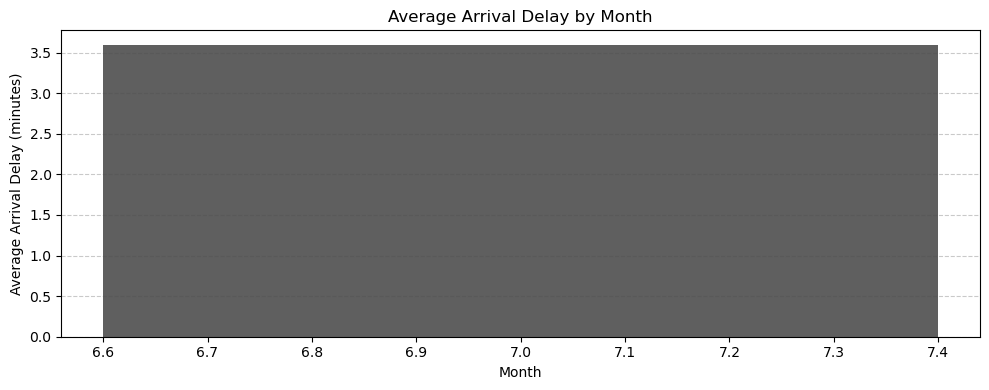

In [31]:
import matplotlib.pyplot as plt

DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

plt.bar(
    avg_delay_by_month["month"],
    avg_delay_by_month["avg_delay_min"],
    color=DB_GREY,
    alpha=0.9
)

plt.xlabel("Month")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay by Month")

plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q11_avg_delay_by_month.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


## **Result**

The analysis shows that the dataset contains arrival delay information for **only one month (July)**. As a result, the average arrival delay is calculated for this single month, and no comparison across different months is possible.

This limitation highlights that the dataset represents a **short time window**, and seasonal trends cannot be fully evaluated. A dataset covering multiple months would be required to assess broader seasonal patterns in arrival delays.


## **Q12. How does the average arrival delay differ between peak and off-peak hours?**

Train traffic intensity varies throughout the day. During peak hours, higher passenger demand and denser train schedules can increase operational pressure, potentially leading to longer delays. In contrast, off-peak hours typically experience lighter traffic and more flexible operations.

This question analyzes **whether trains experience higher average arrival delays during peak hours compared to off-peak hours**, helping to understand the impact of daily demand patterns on punctuality.


In [32]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], errors="coerce")
df["hour"] = df["arrival_plan"].dt.hour

# Define peak and off-peak hours
peak_hours = [7, 8, 9, 16, 17, 18]

df["time_period"] = df["hour"].apply(
    lambda x: "Peak" if x in peak_hours else "Off-Peak"
)

avg_delay_by_period = (
    df[df["arrival_delay_m"] > 0]
    .groupby("time_period")["arrival_delay_m"]
    .mean()
    .reset_index()
    .rename(columns={"arrival_delay_m": "avg_delay_min"})
)
avg_delay_by_period = avg_delay_by_period.sort_values("time_period")

avg_delay_by_period


,time_period,avg_delay_min
0,Off-Peak,3.392523
1,Peak,4.077778


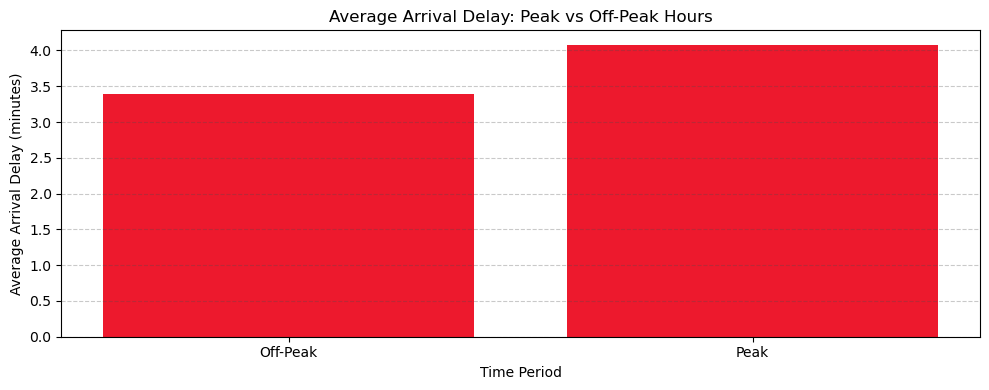

In [33]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

plt.bar(
    avg_delay_by_period["time_period"],
    avg_delay_by_period["avg_delay_min"],
    color=DB_RED,
    alpha=0.9
)

plt.xlabel("Time Period")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay: Peak vs Off-Peak Hours")

plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q12_avg_delay_peak_vs_offpeak.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


## **Result**

The results show that **average arrival delays are higher during peak hours than during off-peak hours**. This indicates that increased passenger demand and tighter scheduling during peak travel periods place greater pressure on train operations, leading to more frequent and longer delays.

In contrast, **off-peak hours exhibit lower average delays**, suggesting smoother operations and reduced network congestion when traffic levels are lighter.


## **Q13. Is there a relationship between planned arrival time and arrival delay?**

Train delays may vary depending on the **planned arrival time of the day**. Certain time windows can experience higher congestion, tighter schedules, or operational constraints.

This question explores whether there is a **relationship between planned arrival time (hour of day)** and **arrival delay**, helping to identify patterns or trends in delays across different times of the day.


In [34]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], errors="coerce")
df["hour"] = df["arrival_plan"].dt.hour

scatter_data = df[df["arrival_delay_m"] > 0][["hour", "arrival_delay_m"]]

scatter_data.head()


,hour,arrival_delay_m
2,22.0,3
5,23.0,1
8,19.0,1
10,15.0,5
11,17.0,2


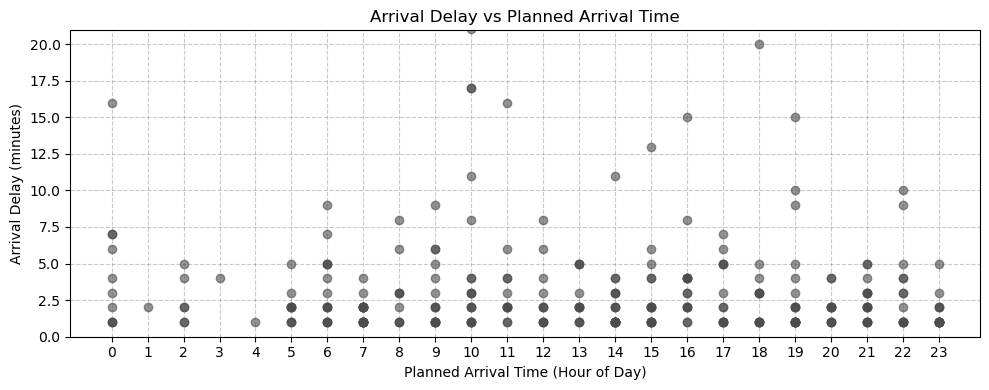

In [35]:
import matplotlib.pyplot as plt

DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

plt.scatter(
    scatter_data["hour"],
    scatter_data["arrival_delay_m"],
    color=DB_GREY,
    alpha=0.6
)

plt.xlabel("Planned Arrival Time (Hour of Day)")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Arrival Delay vs Planned Arrival Time")

plt.xticks(range(0, 24))
plt.grid(axis="both", linestyle="--", alpha=0.3, color=DB_GREY)

plt.ylim(0, scatter_data["arrival_delay_m"].quantile(0.98))

plt.tight_layout()
plt.savefig("../Figs/Q13_delay_vs_arrival_time.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


## **Result**

The scatter plot shows that **arrival delays occur across all planned arrival times**, with no strong linear relationship between arrival time and delay magnitude.

However, **clusters of higher delays appear during certain daytime and evening hours**, suggesting that congestion and operational pressure during busier periods may contribute to increased delays. Overall, arrival time alone does not fully explain delay behavior, indicating that **other factors also play a significant role**.


## **Q14. What proportion of trains are on-time vs delayed?**

Not every trip is late — some arrive on time or even early, while others arrive delayed.
Here I compare the proportion of on-time (≤ 0 min) vs delayed (> 0 min) trips to understand overall punctuality in the dataset.

In [36]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_delay_m"] = pd.to_numeric(df["arrival_delay_m"], errors="coerce")

df["status"] = df["arrival_delay_m"].apply(lambda x: "Delayed" if x > 0 else "On-time / Early")

status_counts = df["status"].value_counts()
status_share = (df["status"].value_counts(normalize=True) * 100).round(2)

status_summary = pd.DataFrame({
    "count": status_counts,
    "share_pct": status_share
}).reset_index().rename(columns={"index": "status"})

status_summary


,status,count,share_pct
0,On-time / Early,696,69.6
1,Delayed,304,30.4


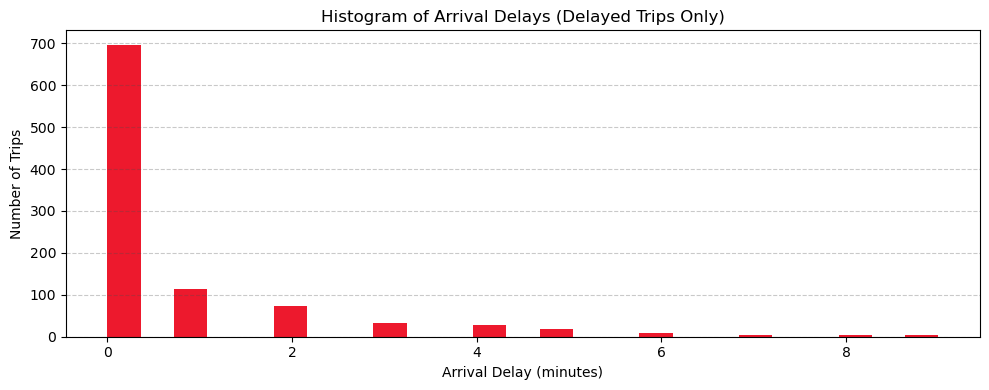

In [37]:
import matplotlib.pyplot as plt

DB_RED = "#EC0016"
DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

hist_data = df["arrival_delay_m"].dropna()

upper = hist_data.quantile(0.98)
hist_data = hist_data[(hist_data >= 0) & (hist_data <= upper)]

plt.hist(hist_data, bins=25, color=DB_RED, alpha=0.9)

plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Number of Trips")
plt.title("Histogram of Arrival Delays (Delayed Trips Only)")

plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q14_delay_histogram_red.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


## **Result**
The analysis shows that around 70% of trains arrive on time or early, while approximately 30% experience delays.
The histogram further reveals that most delays are short, with a small number of trips experiencing longer delays, indicating that severe delays are relatively rare.

## **Q15. How does the arrival delay distribution look overall?**

While average delays provide a general summary, they can hide important details about how delays are actually distributed. Some trains may experience only small delays, while others face much larger disruptions.

This question examines the **overall distribution of arrival delays** to understand the **spread, typical delay range, and presence of extreme values**, helping to assess whether delays are generally minor or occasionally severe.


In [38]:
import pandas as pd

df = pd.read_csv("../data/DBtrainrides_1000.csv")

df["arrival_delay_m"] = pd.to_numeric(df["arrival_delay_m"], errors="coerce")

delay_data = df[df["arrival_delay_m"] > 0]["arrival_delay_m"]

delay_data.describe()


count    304.000000
mean       3.595395
std        5.291887
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       47.000000
Name: arrival_delay_m, dtype: float64

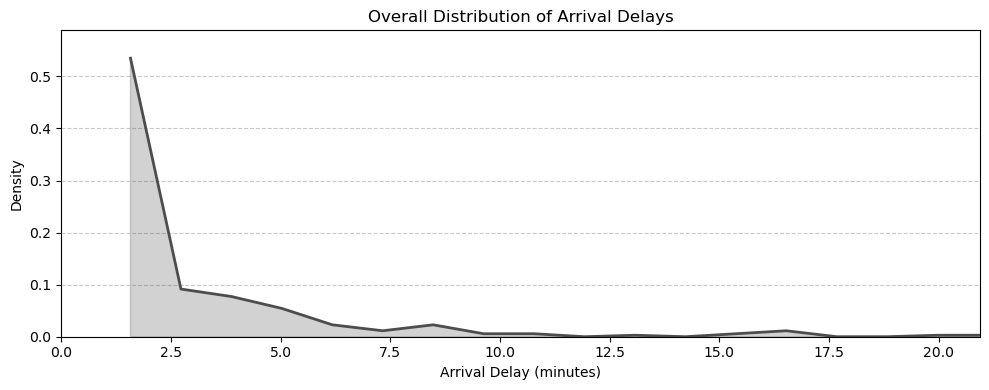

In [39]:
import matplotlib.pyplot as plt
import numpy as np

DB_GREY = "#4D4D4D"

plt.figure(figsize=(10, 4))

# Histogram values (used only to build the line)
counts, bins = np.histogram(delay_data, bins=40, density=True)

centers = (bins[:-1] + bins[1:]) / 2

plt.plot(
    centers,
    counts,
    color=DB_GREY,
    linewidth=2
)

plt.fill_between(
    centers,
    counts,
    color=DB_GREY,
    alpha=0.25
)
plt.xlim(0, delay_data.quantile(0.98))

plt.ylim(0, counts.max() * 1.10)


plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Density")
plt.title("Overall Distribution of Arrival Delays")

plt.grid(axis="y", linestyle="--", alpha=0.3, color=DB_GREY)

plt.tight_layout()
plt.savefig("../Figs/Q15_arrival_delay_distribution_line.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


## **Result**

The boxplot shows that **most arrival delays are relatively small**, with the majority of delayed trains clustering within a **low-minute range**. The median delay lies close to the lower end of the distribution, indicating that **typical delays are minor rather than severe**.

However, the presence of **several high-value outliers** highlights that while uncommon, **large delays do occur**, contributing to overall variability. This suggests that Deutsche Bahn delays are generally manageable but occasionally experience significant disruptions.


## **Conclusion**

This analysis explored train arrival delays from several perspectives, including time of day, peak versus off-peak hours, and the overall distribution of delays. The results show that most trains arrive on time or with only short delays, indicating generally reliable service. However, a smaller number of trips experience longer delays, which noticeably affect the overall delay pattern.

Delays tend to be slightly higher during peak hours, likely due to increased passenger demand, denser schedules, and greater operational complexity. While delays occur throughout the day, the relationship between planned arrival time and delay is not strongly linear, suggesting that delays are influenced by multiple factors rather than time alone.

The distribution analysis reveals that short delays are common, while extreme delays are relatively rare but significant. These longer delays create a right-skewed distribution, highlighting why looking beyond averages is important when assessing punctuality.

Overall, the findings suggest that train services are largely punctual, but focused improvements during peak periods and better management of rare but severe delays could further improve reliability and passenger experience.